In [51]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geomloss import SamplesLoss
import torch

In [52]:
gan_swat_network = pd.read_csv("gan_lstm_swat_network.csv", sep=",").to_numpy()
gan_swat_sensor = pd.read_csv("gan_lstm_swat_sensor.csv", sep=",").to_numpy()
gan_wadi = pd.read_csv("gan_lstm_wadi.csv", sep=",").to_numpy()
gan_wustl = pd.read_csv("gan_lstm_wustl.csv", sep=",").to_numpy()

vae_swat_network = pd.read_csv("vae_swat_network.csv", sep=",").to_numpy()
vae_swat_sensor = pd.read_csv("vae_swat_sensor.csv", sep=",").to_numpy()
vae_wadi = pd.read_csv("vae_wadi_sensor.csv", sep=",").to_numpy()
vae_wustl = pd.read_csv("vae_wustl_network.csv", sep=",").to_numpy()

vae_gan_swat_network = pd.read_csv("vae_gan_swat_network.csv", sep=",").to_numpy()
vae_gan_swat_sensor = pd.read_csv("vae_gan_swat_sensor.csv", sep=",").to_numpy().reshape(2640, 28)
vae_gan_wadi = pd.read_csv("vae_gan_wadi_sensor.csv", sep=",").to_numpy().reshape(1996, 69)
vae_gan_wustl = pd.read_csv("vae_gan_wustl_network.csv", sep=",").to_numpy().reshape(17404, 27)

gan_softmax_swat_network = pd.read_csv("gan_softmax_swat_network_50.csv", sep=",").to_numpy()
gan_softmax_swat_sensor = pd.read_csv("gan_softmax_swat_sensor_50.csv", sep=",").to_numpy()
gan_softmax_wadi = pd.read_csv("gan_softmax_wadi_50.csv", sep=",").to_numpy()
gan_softmax_wustl = pd.read_csv("gan_softmax_wustl_50.csv", sep=",").to_numpy()

In [53]:
swat = pd.read_csv("/home/knel/virtual_envs/ankh-morpork/ICS_data_generation/data/swat_processed.csv", sep=",").to_numpy()[:, 1:]
# swap sport to front
swat[:, [0, 1]] = swat[:, [1, 0]]
# # swap dport to after sport
swat[:, [1, 2]] = swat[:, [2, 1]]
# # swap protocols to after dport
swat[:, [2, 14]] = swat[:, [14, 2]]

wadi = pd.read_csv("/home/knel/virtual_envs/ankh-morpork/ICS_data_generation/data/wadi_attacks.csv", sep=",").to_numpy()[:, 1:]
swat_sensor = pd.read_csv("/home/knel/virtual_envs/ankh-morpork/ICS_data_generation/data/swat_sensor.csv", sep=",").to_numpy()[:, 1:]
wustl = pd.read_csv("/home/knel/virtual_envs/ankh-morpork/ICS_data_generation/data/wustl_attacks.csv", sep=",").to_numpy()[:, 1:]

## SWaT network

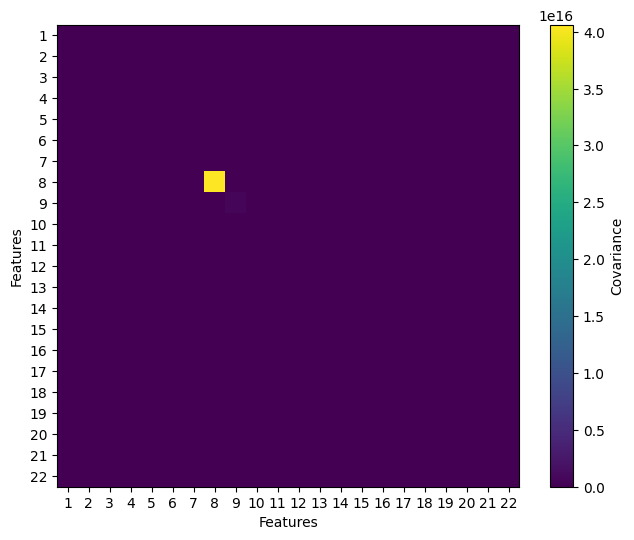

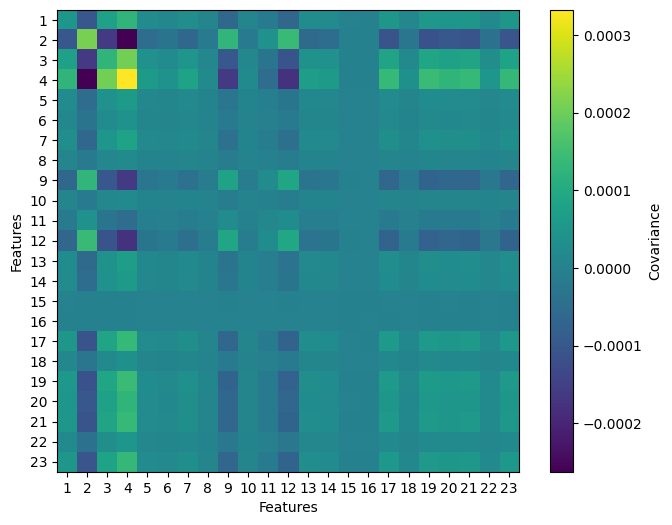

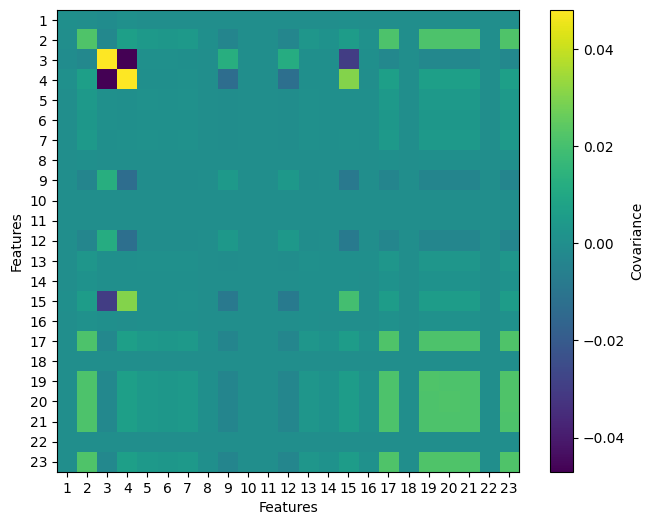

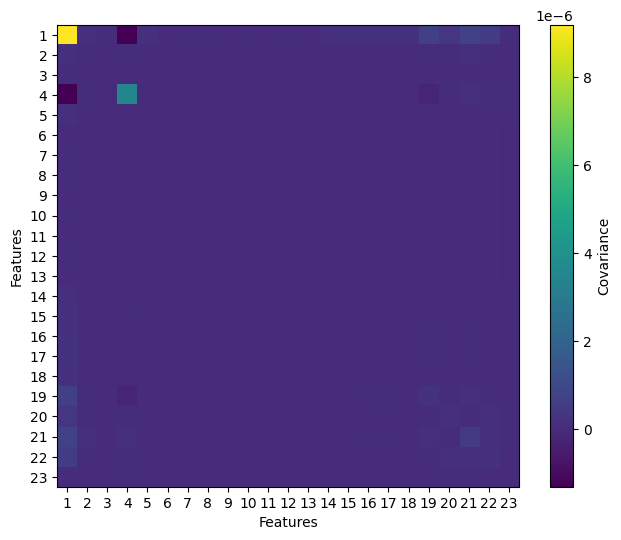

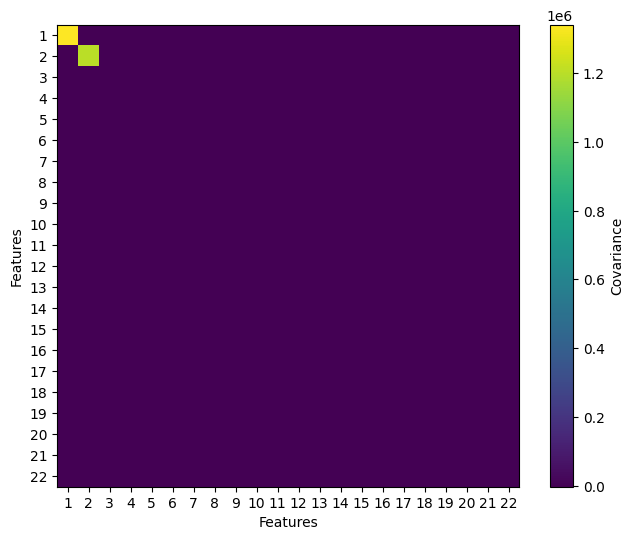

In [61]:
X = swat
cov_matrix1 = np.cov(X, rowvar=False)
cov_matrix2 = np.cov(vae_gan_swat_network, rowvar=False)
cov_matrix3 = np.cov(vae_swat_network, rowvar=False)
cov_matrix4 = np.cov(gan_swat_network, rowvar=False)
cov_matrix5 = np.cov(gan_softmax_swat_network, rowvar=False)

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix1, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix1)), np.arange(1, len(cov_matrix1)+1))
plt.yticks(np.arange(len(cov_matrix1)), np.arange(1, len(cov_matrix1)+1))
plt.savefig("cov_swat.jpg")
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix2, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix2)), np.arange(1, len(cov_matrix2)+1))
plt.yticks(np.arange(len(cov_matrix2)), np.arange(1, len(cov_matrix2)+1))
plt.savefig("cov_vae_gan_swat_network.jpg")
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix3, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix3)), np.arange(1, len(cov_matrix3)+1))
plt.yticks(np.arange(len(cov_matrix3)), np.arange(1, len(cov_matrix3)+1))
plt.savefig("cov_vae_swat_network.jpg")
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix4, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix4)), np.arange(1, len(cov_matrix4)+1))
plt.yticks(np.arange(len(cov_matrix4)), np.arange(1, len(cov_matrix4)+1))
plt.savefig("cov_gan_swat_network.jpg")
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix5, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix5)), np.arange(1, len(cov_matrix5)+1))
plt.yticks(np.arange(len(cov_matrix5)), np.arange(1, len(cov_matrix5)+1))
plt.savefig("cov_gan_softmax_swat_network.jpg")
plt.show()

## SWaT sensor

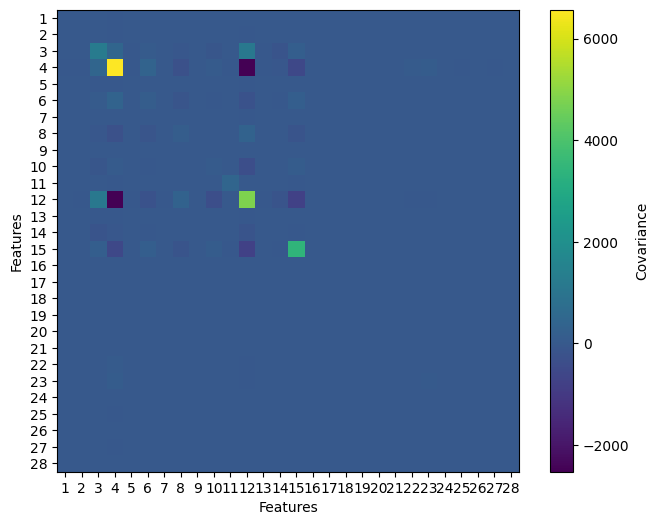

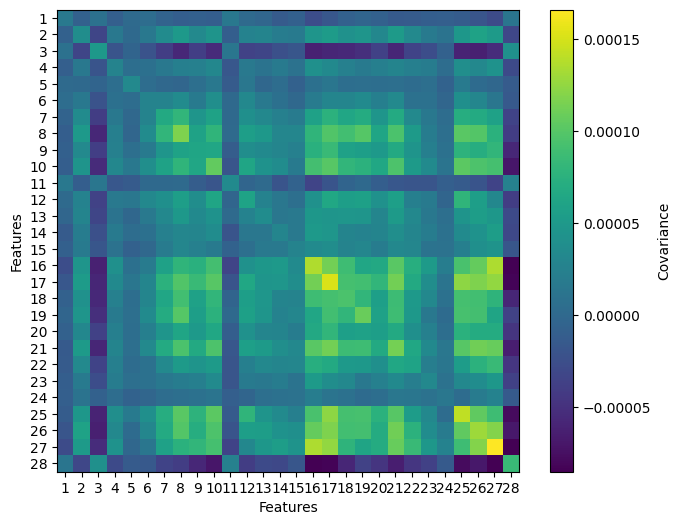

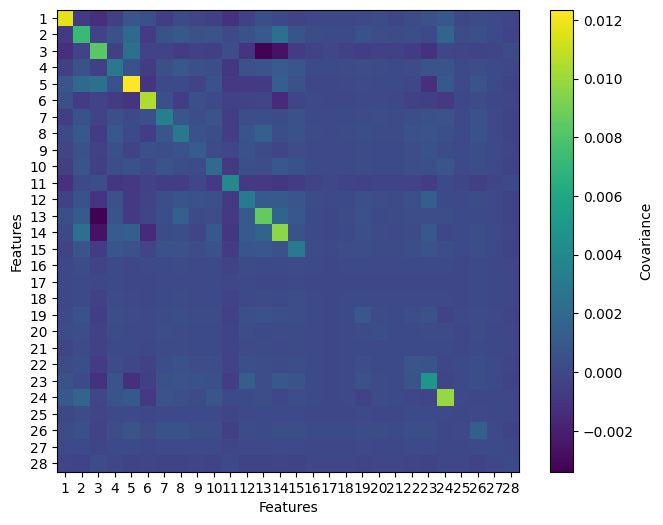

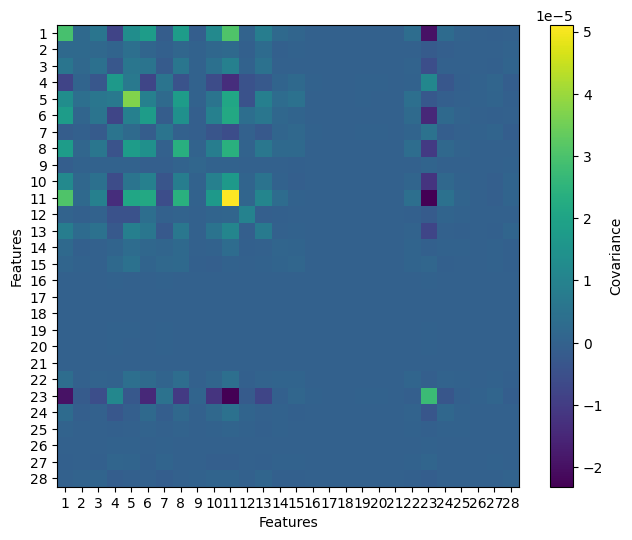

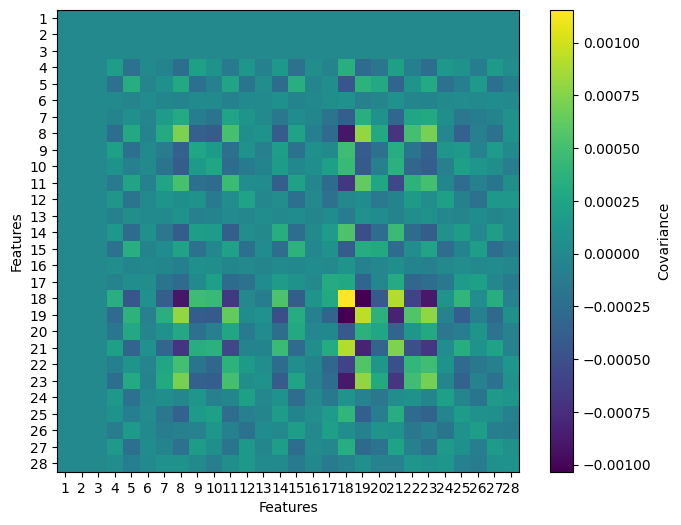

In [63]:
X = swat_sensor
cov_matrix1 = np.cov(X, rowvar=False)
cov_matrix2 = np.cov(vae_gan_swat_sensor, rowvar=False)
cov_matrix3 = np.cov(vae_swat_sensor, rowvar=False)
cov_matrix4 = np.cov(gan_swat_sensor, rowvar=False)
cov_matrix5 = np.cov(gan_softmax_swat_sensor, rowvar=False)

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix1, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix1)), np.arange(1, len(cov_matrix1)+1))
plt.yticks(np.arange(len(cov_matrix1)), np.arange(1, len(cov_matrix1)+1))
plt.savefig("cov_swat_sensor.jpg")
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix2, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix2)), np.arange(1, len(cov_matrix2)+1))
plt.yticks(np.arange(len(cov_matrix2)), np.arange(1, len(cov_matrix2)+1))
plt.savefig("cov_vae_gan_swat_sensor.jpg")
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix3, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix3)), np.arange(1, len(cov_matrix3)+1))
plt.yticks(np.arange(len(cov_matrix3)), np.arange(1, len(cov_matrix3)+1))
plt.savefig("cov_vae_swat_sensor.jpg")
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix4, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix4)), np.arange(1, len(cov_matrix4)+1))
plt.yticks(np.arange(len(cov_matrix4)), np.arange(1, len(cov_matrix4)+1))
plt.savefig("cov_gan_swat_sensor.jpg")
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix5, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix5)), np.arange(1, len(cov_matrix5)+1))
plt.yticks(np.arange(len(cov_matrix5)), np.arange(1, len(cov_matrix5)+1))
plt.savefig("cov_gan_softmax_swat_sensor.jpg")
plt.show()

## WADI

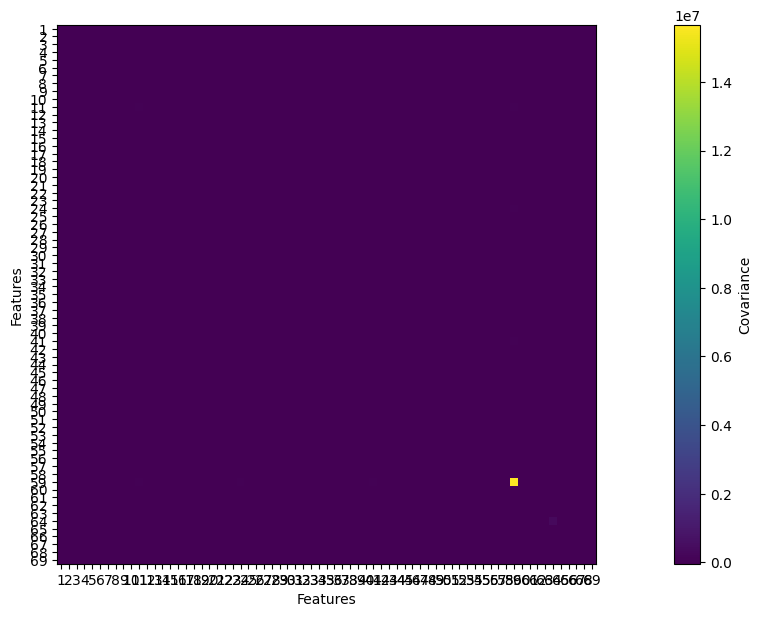

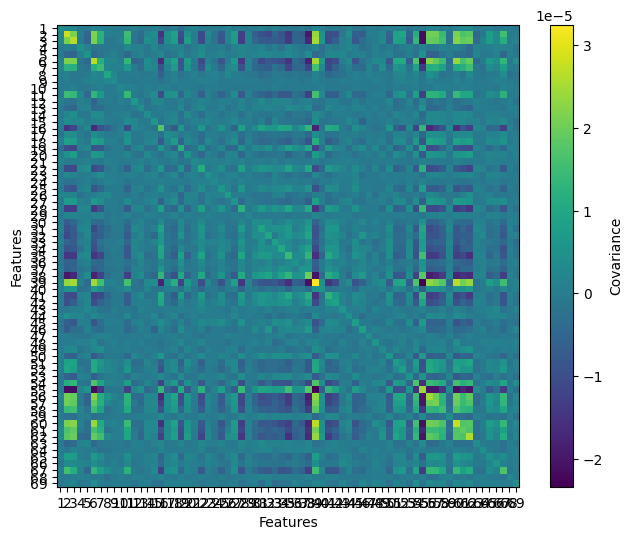

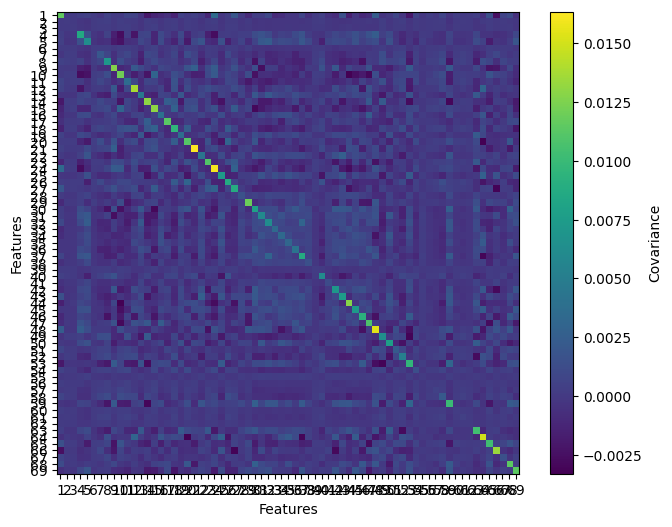

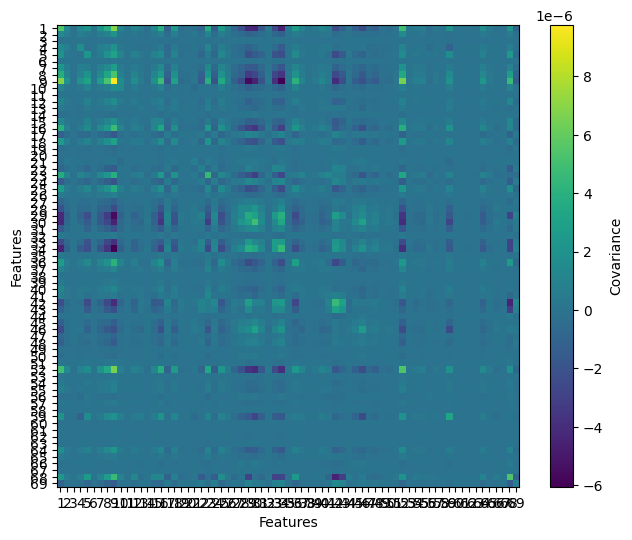

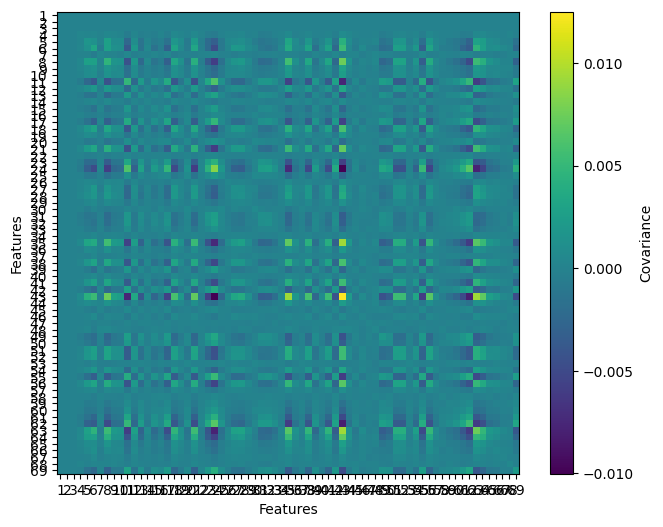

In [67]:
X = wadi
cov_matrix1 = np.cov(X, rowvar=False)
cov_matrix2 = np.cov(vae_gan_wadi, rowvar=False)
cov_matrix3 = np.cov(vae_wadi, rowvar=False)
cov_matrix4 = np.cov(gan_wadi, rowvar=False)
cov_matrix5 = np.cov(gan_softmax_wadi, rowvar=False)

plt.figure(figsize=(20, 7))
plt.imshow(cov_matrix1, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix1)), np.arange(1, len(cov_matrix1)+1))
plt.yticks(np.arange(len(cov_matrix1)), np.arange(1, len(cov_matrix1)+1))
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix2, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix2)), np.arange(1, len(cov_matrix2)+1))
plt.yticks(np.arange(len(cov_matrix2)), np.arange(1, len(cov_matrix2)+1))
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix3, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix3)), np.arange(1, len(cov_matrix3)+1))
plt.yticks(np.arange(len(cov_matrix3)), np.arange(1, len(cov_matrix3)+1))
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix4, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix4)), np.arange(1, len(cov_matrix4)+1))
plt.yticks(np.arange(len(cov_matrix4)), np.arange(1, len(cov_matrix4)+1))
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix5, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix5)), np.arange(1, len(cov_matrix5)+1))
plt.yticks(np.arange(len(cov_matrix5)), np.arange(1, len(cov_matrix5)+1))
# plt.savefig("cov_gan_softmax_wadi.jpg")
plt.show()

## WUSTL

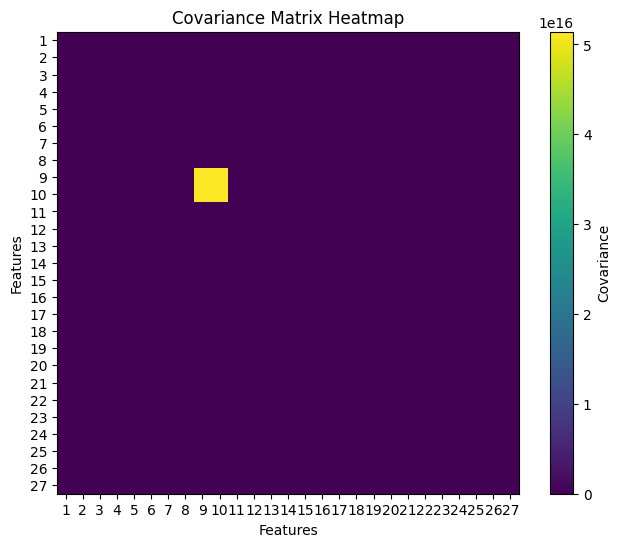

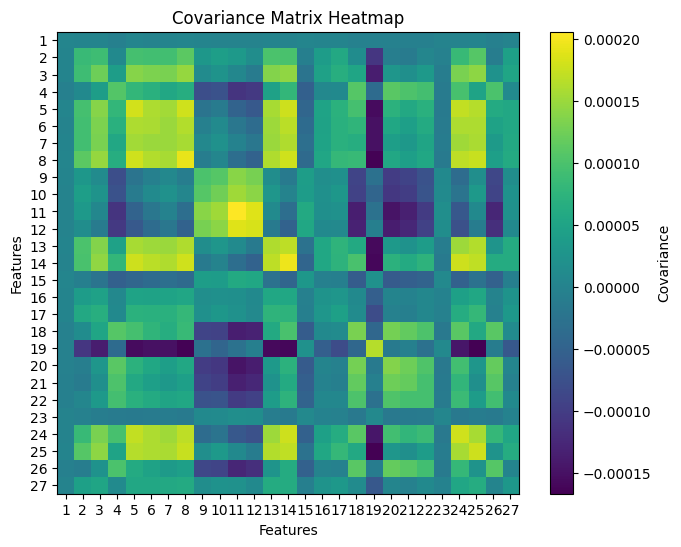

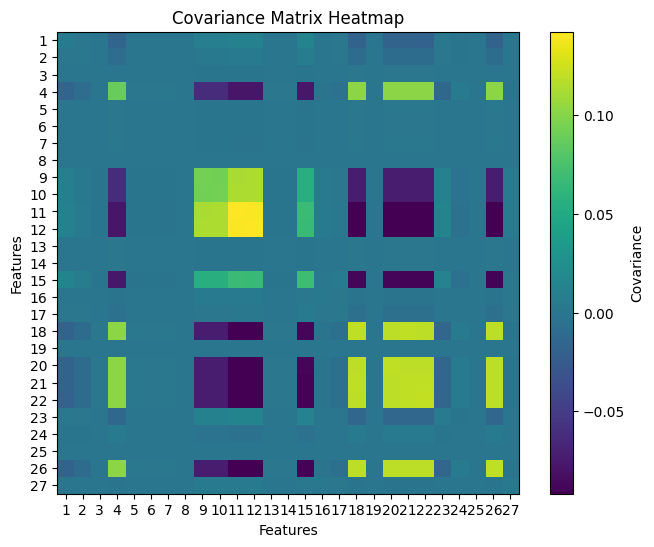

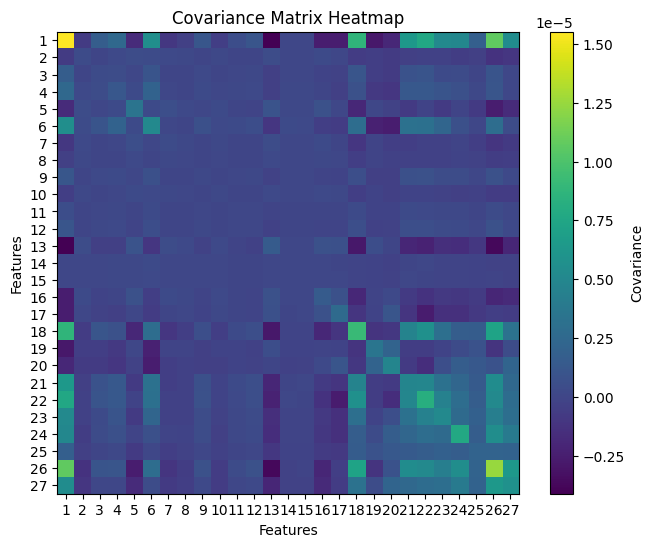

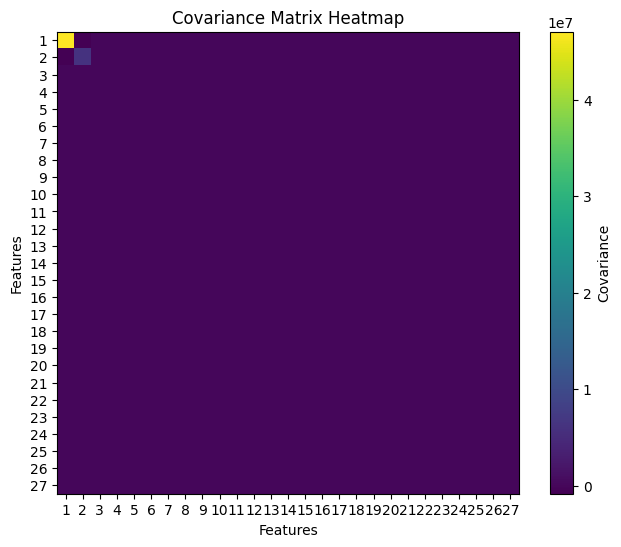

In [58]:
X = wustl
cov_matrix1 = np.cov(X, rowvar=False)
cov_matrix2 = np.cov(vae_gan_wustl, rowvar=False)
cov_matrix3 = np.cov(vae_wustl, rowvar=False)
cov_matrix4 = np.cov(gan_wustl, rowvar=False)
cov_matrix5 = np.cov(gan_softmax_wustl, rowvar=False)

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix1, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix1)), np.arange(1, len(cov_matrix1)+1))
plt.yticks(np.arange(len(cov_matrix1)), np.arange(1, len(cov_matrix1)+1))
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix2, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix2)), np.arange(1, len(cov_matrix2)+1))
plt.yticks(np.arange(len(cov_matrix2)), np.arange(1, len(cov_matrix2)+1))
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix3, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix3)), np.arange(1, len(cov_matrix3)+1))
plt.yticks(np.arange(len(cov_matrix3)), np.arange(1, len(cov_matrix3)+1))
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix4, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix4)), np.arange(1, len(cov_matrix4)+1))
plt.yticks(np.arange(len(cov_matrix4)), np.arange(1, len(cov_matrix4)+1))
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix5, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix5)), np.arange(1, len(cov_matrix5)+1))
plt.yticks(np.arange(len(cov_matrix5)), np.arange(1, len(cov_matrix5)+1))
plt.show()